# Databases assignment 

Currently the Bookshelfia Database is split acrross 5 tables : `customer_list`, `inventory` , `order_detail` , `orders` and `product_info`.

We will read in the the tables and then display the process of normalising the Database to 3rd Normal Norm. 

## Reading in the Database Tables using Pandas. 

In [369]:
import glob 
import pandas as pd 
import numpy as np 

In [370]:
inventory = pd.read_csv('data/inventory.csv') 
orders = pd.read_csv('data/orders.csv') 
customer_list = pd.read_csv('data/customer_list.csv') 
order_detail = pd.read_csv('data/order_detail.csv') 
product_info = pd.read_csv('data/product_info.csv')

## Printing each table as DataFrame

In [371]:
inventory.head(3) 

,Warehouse Location,Product Title,Quantity
0,Corby,Anything week time director,23
1,Corby,Away north interest effect,17
2,Corby,Hair research lay unit,21


In [372]:
orders.head(3) 

,Order ID,Date,Customer ID,Total,Payment Method,Card Number,Authorisation Code
0,8987aed1c965464b9b22b3288bd3690a,2020-02-01 01:08:22,671942,75.01,Google Pay,N/a,db18faa643463c90fd3b0477f1caa6d9c734e577
1,d393984e08ea472da1031172fd781881,2020-02-01 07:32:20,991686,52.25,Paypal,N/a,c1930b607b624f23f86d85211af063e39b859358
2,74e463faf1b34caf928dd5038fb04566,2020-02-01 21:04:45,120455,188.93,Paypal,N/a,0c2866051f1bab13e7b7c4eba1dfcd3bf178ba76


In [373]:
customer_list.head(3) 

,Name,address,email,phone,customer_id
0,Frank Barnett,Flat 59M; Harris terrace; Albertburgh; B6T 2XR,frank.barnett@hotmail.com,+44121 4960637,981686
1,Alexander Ford,Flat 83; Nicole pass; Lake Lewisstad; L8 7YF,alexander.ford@gmail.com,(0131) 4960131,197384
2,Devin Henderson,005 Hargreaves shoal; Port Victor; MK0 8SG,devin.henderson@gmail.com,0116 496 0955,657739


In [374]:
order_detail.head(3) 

,Order ID,Product ISBN,Quantity
0,00044461f0804df68734e42c65c51331,978-1-04-142985-2,1
1,0016fbff105f4954892e8f03a5fc2e20,978-1-893866-80-5,2
2,0016fbff105f4954892e8f03a5fc2e20,978-1-4440-2173-8,5


In [375]:
product_info.head(2) 

,ISBN,Type,Title,Author,Publisher,Genre,Format,Unit Price,Publication Date,Pages,Length,Narrator,Rating
0,978-1-4386-9466-5,eBook,Anything week time director,Denise Anderson,Hachette Livre,Religion and Spirituality,Digital,10.02,13/02/1955,223,NaN,NaN,2.41
1,978-0-7997-1936-9,Book,Away north interest effect,Jacob Lucero,Transworld,Gardening and Nature,Paperback,17.15,05/08/1942,241,NaN,NaN,2.98


# Database Normalisation 

Currently the Database is already normalised each table is in 3rd Normal Form. However, to display the process of normalisation, I will denormalise the data through a series of pandas `joins`. Each of the individual tables with will merged together to create one combined table, which will likely represent what the Database looked like in its denormalised form. 

### Denormalising the Database 

In [376]:
temp1 = order_detail.merge(product_info, left_on = 'Product ISBN', right_on = 'ISBN' ) 
temp1.drop('Product ISBN', inplace = True , axis  = 'columns' ) 
temp2 = temp1.groupby('Order ID').agg(list) 
temp3  =temp2.merge(orders, left_index = True, right_on = 'Order ID').reset_index(drop = True ) 
temp4 = temp3.merge(customer_list, left_on = 'Customer ID', right_on = 'customer_id')

temp4['Order ID'] = temp4.index
temp4.drop(['Customer ID' ] , axis = 'columns' , inplace = True ) 
order_detail = temp4 

## `order_detail` 

Through merging the tables together, I have created a combined table called `order_detail`. 

In [377]:
pd.set_option('display.max_columns', None) 
order_detail.head(3) 

,Quantity,ISBN,Type,Title,Author,Publisher,Genre,Format,Unit Price,Publication Date,Pages,Length,Narrator,Rating,Order ID,Date,Total,Payment Method,Card Number,Authorisation Code,Name,address,email,phone,customer_id
0,[1],[978-1-04-142985-2],[AudioBook],[Wish book these rather white],[Jennifer Solomon],[Pearson],[Classic Fiction],[Audio],[11.32],[21/01/1968],[0],[11:03],[Kemmofer Ikeda],[3.27],0,2021-09-17 20:49:42,11.32,Credit Card,4464042894384166,N/a,Kimberly Brown,5 Ben roads; North Joanna; G15 8PY,kimberly.brown@yahoo.co.uk,+44808 1570202,681089
1,"[2, 5, 1, 5, 1]","[978-1-893866-80-5, 978-1-4440-2173-8, 978-1-7...","[AudioBook, Book, Book, Book, eBook]","[Firm fight better, Manager teach table guy ex...","[John Dickerson, Edgar Simmons, Taylor Best, M...","[Bloomsbury, Transworld, Joffe Books, Severn H...","[Children, Adventure Fiction, Action, Referenc...","[Audio, Paperback, Paperback, Paperback, Digital]","[12.68, 16.8, 67.02, 57.21, 44.57]","[13/07/1963, 07/05/1970, 11/03/1997, 05/09/200...","[0, 184, 287, 172, 228]","[08:37, nan, nan, nan, nan]","[Kemmofer Ikeda, nan, nan, nan, nan]","[1.48, 1.97, 2.99, 2.89, 2.42]",1,2020-06-22 12:19:10,507.00,Paypal,N/a,4c9fd5856caebe0d3560cfe8bc871527d79085f1,Candace Garner,36 Suzanne crossroad; North Gerard; W0 6PY,keith42@hotmail.com,+44151 496 0695,529677
2,[1],[978-1-76063-131-4],[Book],[Board involve sign number simply],[Jesse Bates],[Pearson],[Religion and Spirituality],[Hardback],[43.5],[19/05/1982],[130],[nan],[nan],[4.44],2,2021-05-17 14:57:25,43.50,Google Pay,N/a,d8a52b628ffcf6c4a7ac047292beac54d4885c1a,Kyle Morales,Studio 6; Melissa bypass; Russellborough; B29 4AH,kyle.morales@hotmail.com,(0909)8790031,129088


It is worth mentioning that the `inventory` table has not been merged with the rest. As, it is likely that the `inventory` table prior to normalisation existed as its own table.

Printing the names of fields in `order_detail` : 

In [378]:
order_detail.columns

Index(['Quantity', 'ISBN', 'Type', 'Title', 'Author', 'Publisher', 'Genre',
       'Format', 'Unit Price', 'Publication Date', 'Pages', 'Length',
       'Narrator', 'Rating', 'Order ID', 'Date', 'Total', 'Payment Method',
       'Card Number', 'Authorisation Code', 'Name', 'address', 'email',
       'phone', 'customer_id'],
      dtype='object')

# First Normal Form 

To normalise the table above it must be passed through all the normalisation steps from 1st to 3rd normal form sequentially.
In order for a database to be in a particular Normal Form, all its tables must be exist in that particular normal form. Normal Form requirements apply to the individual tables within a database. 

### First Normal Form requirements for Table:

1. Every field/column name must be unique.
2. All Values in the same field should be in the same domain/topic.
4. Values in fields should be atomic ( only one value can be stored within each cell ).
5. No two records can be identical.
6. Table must have a primary key. 

### Current Database status 

- All field names are unique
- All values in the same field/column are in the same domain. 
- All values are not atomic in `order_detail` multiple values are being stored within a single cell. E.g. Multiple ISBNs are stored in the same cell, in the case multiple books are included within an order.  
- `order_detail` has a primary key `Order ID` and `inventory` has a composite key `Product Title`, `Warehouse Location`. Meaning all records in both tables are unique, satisfying conditions 5 and 6. 

## Transforming `order_detail` to First Normal Form 

As `order_detail` doesn't meet the requirements for 1st Normal Form, the table must be transformed. 

In order to solve the issue of data not being atomic, rather than using a single row to store each order, leading to fields such as `ISBN` storing multiple values. Instead, we will store the order of each item in an individual row. This means that a single order will be represented using n rows where n is the number of unique items within that order. 

To visualise what this transformation looks like, `order_detail` has been transformed into 1st Normal Form using Pandas `explode` function on every field which is currently not atomic. 

In [379]:
order_detail = order_detail.explode(['ISBN', 'Quantity',  'Type', 'Title', 'Author', 'Publisher', 'Genre', 'Format', 'Unit Price', 'Publication Date', 'Pages', 'Length', 'Narrator', 'Rating' ] ) 
order_detail.head(3) 

,Quantity,ISBN,Type,Title,Author,Publisher,Genre,Format,Unit Price,Publication Date,Pages,Length,Narrator,Rating,Order ID,Date,Total,Payment Method,Card Number,Authorisation Code,Name,address,email,phone,customer_id
0,1,978-1-04-142985-2,AudioBook,Wish book these rather white,Jennifer Solomon,Pearson,Classic Fiction,Audio,11.32,21/01/1968,0,11:03,Kemmofer Ikeda,3.27,0,2021-09-17 20:49:42,11.32,Credit Card,4464042894384166,N/a,Kimberly Brown,5 Ben roads; North Joanna; G15 8PY,kimberly.brown@yahoo.co.uk,+44808 1570202,681089
1,2,978-1-893866-80-5,AudioBook,Firm fight better,John Dickerson,Bloomsbury,Children,Audio,12.68,13/07/1963,0,08:37,Kemmofer Ikeda,1.48,1,2020-06-22 12:19:10,507.00,Paypal,N/a,4c9fd5856caebe0d3560cfe8bc871527d79085f1,Candace Garner,36 Suzanne crossroad; North Gerard; W0 6PY,keith42@hotmail.com,+44151 496 0695,529677
1,5,978-1-4440-2173-8,Book,Manager teach table guy experience give,Edgar Simmons,Transworld,Adventure Fiction,Paperback,16.8,07/05/1970,184,NaN,NaN,1.97,1,2020-06-22 12:19:10,507.00,Paypal,N/a,4c9fd5856caebe0d3560cfe8bc871527d79085f1,Candace Garner,36 Suzanne crossroad; North Gerard; W0 6PY,keith42@hotmail.com,+44151 496 0695,529677


Exploding out the `order_detail` to ensure the data in each cell is atomic, means that `Order ID` is no longer a unique identifier for each row in the table. However, each row is uniquely identifiable with a composite key comprised of `Order ID` and `ISBN`. Meaning that the table above meets all of the necessary requirements for 1st Normal Form. 

# Second Normal Form 

### Second Normal Form Requirements

- In 1st Normal Form. 

- All tables should have a primary key. 

- All non-key columns should depend on the entire Primary Key not only part of it in the case of a Composite Key. 

### Current Database 

- `order_detail` and `inventory` table is in 1st Normal Form. 

- `order_detail` and `inventory` both have composite Primary Keys. 

- in `order_detail` not all non-key columns depend on the entire Composite Key.

This means that `inventory` is in 2nd Normal Form but `order_detail` is not. 

## Transforming Database to Second Normal Form 

Not all fields within `order_detail` are dependent on the entire Composite Key (`ISBN`, `Order ID` ), leading to partial dependency within the `order_detail` table. 

### Partial dependencies: 

- The columns storing information about each book (Title, Author, etc) are only dependent on the `ISBN` rather than the entire Composite Key. 

- Fields which store information regarding each customer e.g. (Name, Address, phone, email ) are only dependent on `Order ID` . 

- Fields which store information regarding the order e.g. (Date, Payment Method, Total, Card Number and Authorisation Code) are also only dependent on `Order ID`.

In order to remove the partial dependencies from the `order_detail` table, we can create 2 new tables :  a `product_info` table storing information about each book and a `orders` table which stores the details for each order and the customer information. 

It is also worth noting that in order to convert the Database to 2nd Normal Form, the new tables created must also meet the requirements for 2nd Normal Form. 

### Creating a Product Table 

Creating product table which stores all of the fields which are only dependent on `ISBN` with `ISBN` is the Primary Key. 

In [380]:
dependent_on_isbn = ['Type', 'Title', 'Author', 'Publisher', 'Genre', 'Format', 'Unit Price', 
                     'Publication Date', 'Pages', 'Length','Narrator', 'Rating' ]

In [381]:
product_info = order_detail.groupby('ISBN')[dependent_on_isbn ].first().reset_index()
product_info.head()

,ISBN,Type,Title,Author,Publisher,Genre,Format,Unit Price,Publication Date,Pages,Length,Narrator,Rating
0,978-0-00-104847-8,Book,Establish game pretty,Briana Brooks,Penguin Books,Fantasy,Paperback,41.56,11/10/2005,176,None,None,2.43
1,978-0-00-298160-6,eBook,Break meet set whatever,Kevin Martinez,Transworld,Comedy,Digital,12.5,24/02/2008,142,None,None,2.62
2,978-0-00-366059-3,Book,Network scientist attention paper agreement,Kristen Strong,Joffe Books,Crime Fiction,Paperback,24.3,01/03/1976,125,None,None,2.44
3,978-0-00-455303-0,eBook,Then deal animal stop relationship president,Lisa Mills,Corner Stone,Action,Digital,29.29,02/10/1985,89,None,None,2.03
4,978-0-00-510360-9,eBook,Entire number star area majority,Kristopher Smith,Harper Collins,Adventure Fiction,Digital,35.3,12/02/1969,177,None,None,3.79


There are no Partial Dependencies in `product_info`, Hence it is in 2nd Normal Form. 

After creating `product_info`, we can drop all book related fields apart from `ISBN` from `order_detail`.`ISBN` is the Foreign Key within the `orders` table, it creates the link between `product_info` and `order_detail`. 

In [382]:
order_detail.drop(dependent_on_isbn, axis = 'columns' , inplace = True )
order_detail.head(3) 

,Quantity,ISBN,Order ID,Date,Total,Payment Method,Card Number,Authorisation Code,Name,address,email,phone,customer_id
0,1,978-1-04-142985-2,0,2021-09-17 20:49:42,11.32,Credit Card,4464042894384166,N/a,Kimberly Brown,5 Ben roads; North Joanna; G15 8PY,kimberly.brown@yahoo.co.uk,+44808 1570202,681089
1,2,978-1-893866-80-5,1,2020-06-22 12:19:10,507.00,Paypal,N/a,4c9fd5856caebe0d3560cfe8bc871527d79085f1,Candace Garner,36 Suzanne crossroad; North Gerard; W0 6PY,keith42@hotmail.com,+44151 496 0695,529677
1,5,978-1-4440-2173-8,1,2020-06-22 12:19:10,507.00,Paypal,N/a,4c9fd5856caebe0d3560cfe8bc871527d79085f1,Candace Garner,36 Suzanne crossroad; North Gerard; W0 6PY,keith42@hotmail.com,+44151 496 0695,529677


### Creating Orders Table 

Finally, an `Orders` table which stores all of the fields which are dependent on  `Order ID`  will be created, in order to remove the remaining Partial Dependencies from `order_detail`. 

The `orders` table will store all fields regarding the order such as (Date, Total), as well as information regarding the customer such as (Address, email) 

Defining a list of fields which are dependent on `Order ID`

In [383]:
dependent_on_order_id  = [ 'Date', 'Total', 'Payment Method', 'Card Number', 'Authorisation Code',
                          'Name', 'address','email', 'phone' , 'customer_id']

We create the `orders` table by grouping by `Order ID`, selecting all of the columns dependent on `Order ID` and then using the `first()` aggregator in pandas. 

Printing the first 3 rows of the `orders` table. 

In [384]:
orders = order_detail.groupby('Order ID')[dependent_on_order_id].first().reset_index() 
orders.head(3) 

,Order ID,Date,Total,Payment Method,Card Number,Authorisation Code,Name,address,email,phone,customer_id
0,0,2021-09-17 20:49:42,11.32,Credit Card,4464042894384166,N/a,Kimberly Brown,5 Ben roads; North Joanna; G15 8PY,kimberly.brown@yahoo.co.uk,+44808 1570202,681089
1,1,2020-06-22 12:19:10,507.00,Paypal,N/a,4c9fd5856caebe0d3560cfe8bc871527d79085f1,Candace Garner,36 Suzanne crossroad; North Gerard; W0 6PY,keith42@hotmail.com,+44151 496 0695,529677
2,2,2021-05-17 14:57:25,43.50,Google Pay,N/a,d8a52b628ffcf6c4a7ac047292beac54d4885c1a,Kyle Morales,Studio 6; Melissa bypass; Russellborough; B29 4AH,kyle.morales@hotmail.com,(0909)8790031,129088


`Order ID` is the primary key within the `orders` table. Also, we can confirm that `orders` is in 2nd Normal Form, as there are no partial dependencies and all fields are dependent on the Primary Key `Order ID`. 

All fields dependent on `Order ID` can be dropped from  `order_info`. The `Order ID` field in `order_info`  is a Foreign Key linking the `orders` table to the `order_info` table.  

In [385]:
order_detail.drop(dependent_on_order_id ,  axis = 'columns' , inplace = True ) 

Printing the first 3 rows or `order_detail`.

In [386]:
order_detail.head(3) 

,Quantity,ISBN,Order ID
0,1,978-1-04-142985-2,0
1,2,978-1-893866-80-5,1
1,5,978-1-4440-2173-8,1


`order_detail` is now in 2nd Normal Form, as there are no Partial Dependencies. `Quantity`,the only non-key field, is fully dependent on the Composite Key(`ISBN`, `Order ID`). 

As all four of the tables `order_detail`, `orders`, `inventory` and `product_info` are in the 2nd Normal Form, the Database is also in 2nd Normal Form. 

# Third Normal Form 

### Third Normal Form requirements 

- Already in 2nd  Normal Form.
  
-  No transitive dependencies (no non-key field must be dependent on the Primary Key through another non-key field). 

### Current Database 

- All tables are in second Normal Form

- No transitive dependencies exist in `product_info` , `inventory` and `order_detail` but transitive dependencies exist in the `orders` table. 

### Transitive dependency within the `orders` table

Printing the first 3 rows of the orders table 

In [387]:
orders.head(3) 

,Order ID,Date,Total,Payment Method,Card Number,Authorisation Code,Name,address,email,phone,customer_id
0,0,2021-09-17 20:49:42,11.32,Credit Card,4464042894384166,N/a,Kimberly Brown,5 Ben roads; North Joanna; G15 8PY,kimberly.brown@yahoo.co.uk,+44808 1570202,681089
1,1,2020-06-22 12:19:10,507.00,Paypal,N/a,4c9fd5856caebe0d3560cfe8bc871527d79085f1,Candace Garner,36 Suzanne crossroad; North Gerard; W0 6PY,keith42@hotmail.com,+44151 496 0695,529677
2,2,2021-05-17 14:57:25,43.50,Google Pay,N/a,d8a52b628ffcf6c4a7ac047292beac54d4885c1a,Kyle Morales,Studio 6; Melissa bypass; Russellborough; B29 4AH,kyle.morales@hotmail.com,(0909)8790031,129088


Despite all of the fields being dependent on `Order ID`. The fields concerning a customers personal information (`Name`, `address`, `email` and `phone`) are all dependent on `Order ID` through `customer_id`, which is a non-key field. 

The transitive dependency within the `orders` table can be displayed as: 

<center> <code>Order ID</code>---> <code>customer_id</code> ---> <code>[Name, address, email , phone]</code></center>

In order to remove this transitive dependency, a separate table containing all fields which are dependent on `customer_id` called `customer_list` can be created. 

### Creating a Customers table 

Defining a list of all fields which are dependent on `customer_id`. 

In [388]:
dependent_on_customer_id = ['Name', 'address', 'email', 'phone'] 

Similar to the creation of other tables, we will group by the Primary key `customer_id` and aggregate over all of the dependent fields using `first()`. 

In [389]:
customer_list = orders.groupby('customer_id')[dependent_on_customer_id].first().reset_index() 
customer_list.head(3) 

,customer_id,Name,address,email,phone
0,112552,Thomas York,390 Hayward fort; Lindseymouth; IP4 1AE,thomas.york@gmail.com,+4428 9018 0416
1,112948,Herbert Stevenson,0 Rhodes view; North Eleanor; S0 6UT,herbert.stevenson@hotmail.co.uk,+44(0)20 7496 0099
2,113435,Mariah Walker,Flat 4; Manning greens; Annfort; E1E 0ZN,macdonaldjamie@hotmail.com,0131 4960961


`customer_id` is the Primary Key in `customer_list` and as are no Transitive Dependencies in `customer_list` the table is in 3rd normal form. 

As we now have `customer_list`, we can drop all columns dependent on `customer_id` from `orders`. `customer_id` is the Foreign Key in the `orders` table linking the `orders` and `customer_list` together. 

In [390]:
orders.drop(dependent_on_customer_id, axis = 'columns' , inplace = True ) 
orders.head(3) 

,Order ID,Date,Total,Payment Method,Card Number,Authorisation Code,customer_id
0,0,2021-09-17 20:49:42,11.32,Credit Card,4464042894384166,N/a,681089
1,1,2020-06-22 12:19:10,507.00,Paypal,N/a,4c9fd5856caebe0d3560cfe8bc871527d79085f1,529677
2,2,2021-05-17 14:57:25,43.50,Google Pay,N/a,d8a52b628ffcf6c4a7ac047292beac54d4885c1a,129088


The Transitive Dependencies within `orders` have been removed by creating `customer_list`, Hence `orders` is now in 3rd Normal Form. 

Now as all 5 of our tables `order_detail`, `orders`, `customer_list`,  `product_info` and `inventory` are all in 3rd Normal Form, the Database is also in 3rd Normal Form. 

# Bookshelfia Database Schema and Entity Relationship Diagram 

Schema and Entity Relationship Diagram for the Bookshelifa Database, which we normalised to 3rd Normal Form above. 

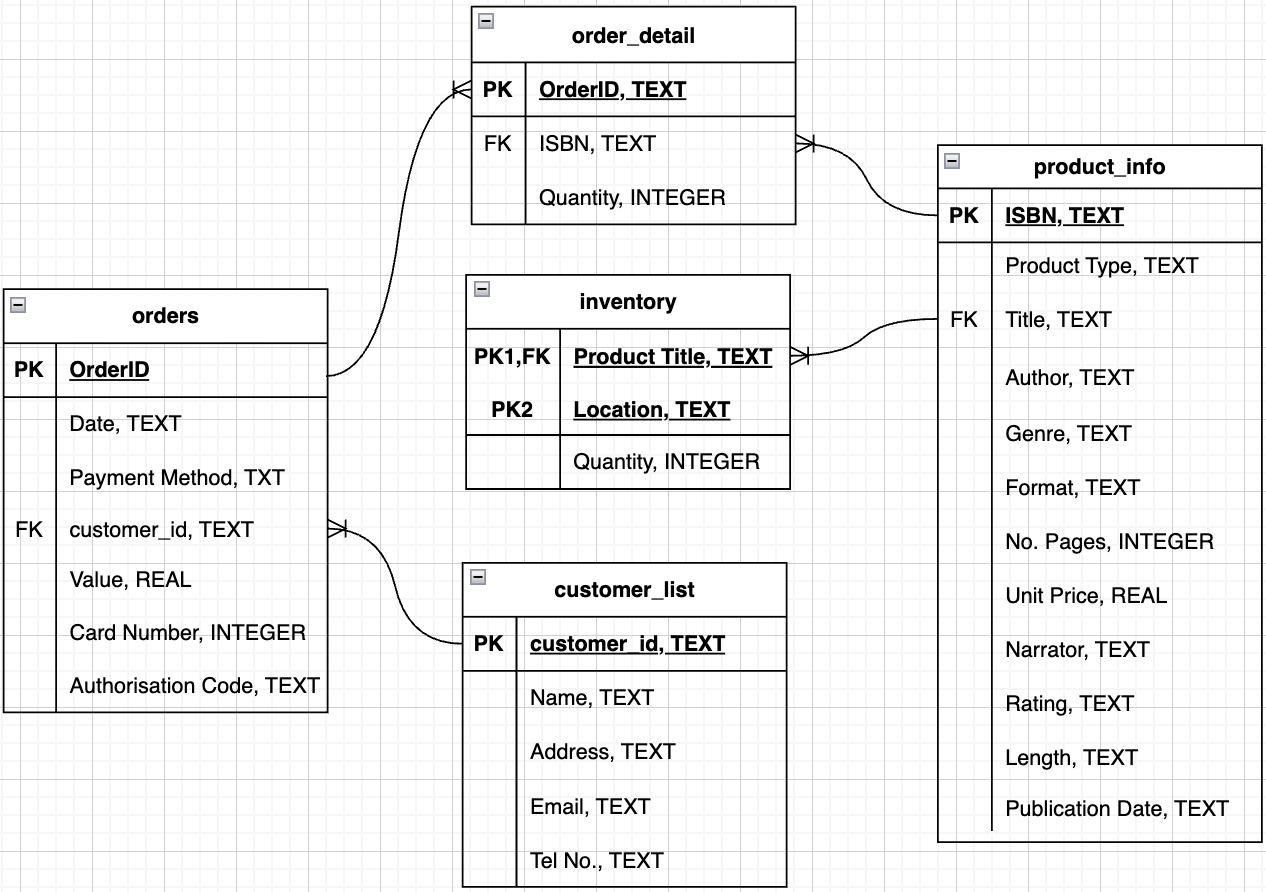

The diagram shows the fields and their associated types for each table within the Database. Also, it displays relationships between each of the tables. 

There is a One-To-Many relationship between the `customer_list` and `orders` table, as a single customer can place many orders. The One-To-Many relationship is shown visually on the Diagram with the crows foot symbol (facing towards `orders`) linking the `customer_id` fields between the two tables. `customer_id` is the Primary Key in `customer_list` and it is a Foreign Key in `orders`, these are denoted within diagram by `PK` and `FK` respectively. 

There are other One-To-Many relationships in the Database. There is a  One-To-Many relationship between the  `product_info` and `inventory`, As a  single book can be linked to multiple records within the inventory table (A book may have different levels of stock at different locations). 



The datatypes shown next to each field, are the the ones supported by sqlite, the database engine which will be used later in the notebook. 

# Creating the Database in sqlite 

## Question 1. 

[sqlite3](https://docs.python.org/3/library/sqlite3.html) library will be used to create and query the Database. 

In [391]:
#importing sqlite 
import sqlite3 

Defining the type conversions from the pandas datatypes to sqlite datatypes. This will be used to specify the datatypes for each field when converting the pandas `DataFrame`'s to SQL tables. 

In [392]:
type_conversions = {
    'object' : 'text' , 
    'int64' : 'integer', 
    'float64' : 'real', }

Python function to convert a  `DataFrame` into a SQL table, using  pandas `tosql()` function. 

In [393]:
def df2db(df, dbname, tablename):

    #converting the pandas dataypes for each field within the DataFrame to the sqlite datatype 
    fieldtypes = { key : type_conversions[str(value)] for key,value in df.dtypes.items()  } 

    #initialising the connection to the database named dbname
    connection = sqlite3.connect(dbname)

    #using to_sql function, 
    df.to_sql(name = tablename,
              con=connection,
              if_exists='replace',
              index=False,
              dtype=fieldtypes
             ) 
    #commit operation and then closing the connection with the database 
    connection.commit() 
    connection.close() 

As we have now a function to convert and upload our pandas `DataFrame`'s to a SQL Database. We will create a database called `books.sqlite` inside of the data directory. 

In [394]:
#creating database 
con = sqlite3.connect('data/books.sqlite') 
con = con.cursor() 

initalising a dictionary of the tables and their names

In [395]:
dataframes = { 'inventory' : inventory, 'orders' :  orders, 'customer_list' :   customer_list, 'order_detail' :  order_detail, 'product_info' : product_info }

Iterating through each table in the `dataframes` dictionary and uploading them to the SQL Database. 

In [396]:
for name, df in dataframes.items(): 
    df2db(df, 'data/books.sqlite', name ) 

Testing that the tables have been uploaded correctly by querying for the last 2 rows from the `order_detail` table. 

In [397]:
conn = sqlite3.connect('data/books.sqlite')
cur = conn.cursor() 

#Executing SQL query 
cur.execute('SELECT * FROM order_detail LIMIT 2 ')

items = cur.fetchall() 
conn.commit() 
conn.close() 
items 

[('1', '978-1-04-142985-2', 0), ('2', '978-1-893866-80-5', 1)]

### `execute_query` Function 

First we will define a function which simplifies the process of querying a Database. It takes two arguments: the query you wish to run and the filepath of the Database you want to query stored locally. 

The function handles the process of connecting to the Database,  executing the desired query, committing any changes as a result of the query and finally closing the Database connection.

In [398]:
def execute_query(query : str,
                  dbname : str) -> list: 
    
    connection = sqlite3.connect(dbname)
    connection.isolation_level = None 
    cur = connection.cursor() 
    cur.execute(query) 
    items = cur.fetchall()
    connection.commit() 
    connection.close() 

    return items 

## Question 2. 

The query below shows the total number of unique books which belong to each book type. 

In [399]:
query = ''' SELECT type, COUNT(type)
            FROM product_info
            GROUP BY type
            ORDER BY COUNT(type) DESC '''

execute_query(query, 'data/books.sqlite') 

[('Book', 1413), ('eBook', 305), ('Magazine', 204), ('AudioBook', 107)]

Below is a slightly different query to the one above, it calculates the number of each book type which are currently in stock. It does this by joining `inventory` to `product_info`. Then it groups by type and then calculates the total number of books in-stock using `SUM`. 

In [400]:
query = '''
        SELECT SUM(inventory.Quantity), product_info.type 
        FROM inventory 
        INNER JOIN product_info on product_info.Title = inventory.[Product Title]
        GROUP BY product_info.type
        '''

In [401]:
execute_query(query, 'data/books.sqlite') 

[(3570, 'AudioBook'), (49646, 'Book'), (6634, 'Magazine'), (11218, 'eBook')]

## Question 3.

Query to retrieve all books of a particular genre that have the highest rating. 

The query below retrieves the top 10 comic books which have the highest ratings. This is done by first filtering the `product_info` table using `WHERE` such that it only includes comic books. Then ordering the remaining rows by rating using `ORDER BY` and finally extracting the top 10 by using `LIMIT`. 

In [402]:
query = ''' SELECT Title, Rating
            FROM product_info
            WHERE Genre = 'Comics' 
            ORDER BY Rating DESC
            LIMIT 10 '''

execute_query(query, 'data/books.sqlite') 

[('Unit me election me', '4.02'),
 ('Together agree avoid up it help', '4.02'),
 ('Receive beautiful occur', '3.71'),
 ('Night nor world fine consumer head', '3.46'),
 ('Rule season sign big them', '3.41'),
 ('Position individual professional', '3.36'),
 ('Team name to matter', '3.32'),
 ('Mind together social', '3.23'),
 ('Identify care young apply attorney from', '3.11'),
 ('History manage people enjoy night', '3.03')]

## Question 4. 

Retrieve all the names and addresses of customers who have placed an order in the last month. 

In order to do this, the `customer_list` was joined to `orders`.  After this, the joined table was filtered for all records with a date greater than the date one month ago, using the `Date` function with the `now` keyword. 

In [403]:
query = ''' SELECT customer_list.Name, customer_list.email
            FROM orders
            INNER JOIN customer_list ON orders.customer_id = customer_list.customer_id
            WHERE Date >= Date('now', '-1 month')'''

execute_query(query, 'data/books.sqlite') 

[]

## Question 5. 

Calculate revenue generated in the last quarter. 

We will define the last quarter as the last 3 months which precede the current month. E.g if the month was June, the last quarter would concern March, April and May. 

Filtering for all of the dates within the last quarter using the `WHERE` clause with the `strftime` function, searching for dates which are greater than the start of the month 4 months ago but less than the start of the current month. Then the Totals of each order within this period are summed using the `SUM` aggregator. 

The `%m` pattern is used to extract the month from each date. 

In [404]:
query = '''
        SELECT sum(Total)
        FROM orders
        WHERE strftime( '%m' , Date) > strftime( '%m',  'now', '-4 month' ) AND 
              strftime( '%m' , Date) < strftime( '%m',  'now') ''' 

execute_query(query, 'data/books.sqlite') 

[(126094.3,)]

## Question 6. 

Retrieve the top 5 best selling books of all time. 

Grouping `orders` by `ISBN` and then calculating the total quantity of books soled using the `SUM` aggregator. Finally, the results are sorted in descending order and the top 5 results are returned. 

It is worth noting that this query makes the assumption that "books" is referring to all types of books including magazines, Audio Books etc rather than just those with the "book" type. 

In [405]:
query = ''' SELECT ISBN, SUM(Quantity)
            FROM order_detail
            GROUP BY ISBN
            ORDER BY SUM(Quantity) DESC
            LIMIT 5 '''

execute_query(query, 'data/books.sqlite') 

[('978-1-76063-131-4', 92),
 ('978-1-241-31906-9', 91),
 ('978-1-07-727420-4', 59),
 ('978-0-14-017970-5', 25),
 ('978-1-02-123386-8', 23)]

## Question 7. 

Query to retrieve the names of customers who have  purchased a book from a particular author. 

Holly Lee will be our selected author. 

To retrieve the names of everyone who have purchased a book from Holly Lee. First, we will create a subquery which returns the `Order ID`s of all orders which included a book written by Holly Lee.

Then, we will join `customer_list` to `orders` and then filter the joined table using a `WHERE` clause, filtering for `Order ID`s in the list of `Order ID`s created by the subquery. 

In [406]:
query = ''' SELECT customer_list.Name 
            FROM orders
            INNER JOIN customer_list on orders.customer_id = customer_list.customer_id

            WHERE orders.[Order ID] in 

            -- Subquery 
            
            (
            SELECT order_detail.[Order ID]
            FROM order_detail
            INNER JOIN product_info on order_detail.ISBN = product_info.ISBN
            WHERE product_info.Author = "Holly Lee" ) 
            
            '''
execute_query(query, 'data/books.sqlite') 

[('Melissa Robinson',),
 ('Michael Ayers',),
 ('Andrea Gilbert',),
 ('Robin Mcintyre',),
 ('Joshua Hancock',)]

Below is an alternative version of the query above which uses an additional join rather than a subquery. 

In [407]:
query = ''' SELECT customer_list.Name

            FROM order_detail
            INNER JOIN orders on orders.[Order ID] = order_detail.[Order ID] 
            INNER JOIN product_info on product_info.ISBN = order_detail.ISBN
            INNER JOIN customer_list on customer_list.customer_id = orders.customer_id

            WHERE product_info.Author = "Holly Lee"
            
             '''

execute_query(query, 'data/books.sqlite')

[('Melissa Robinson',),
 ('Michael Ayers',),
 ('Andrea Gilbert',),
 ('Robin Mcintyre',),
 ('Joshua Hancock',)]

## Question 8. 

Retrieve the names of all customers who have purchased at least one of each book type. 

This query requires multiple joins as we have to combine lots of different information together.

First join `orders` to `order_detail`, then join`customer_list` to the joined table and finally join `product_info`to the joined table. 

Finally, we group the joined table by `customer_id` and then filter for customers which have ordered a total of 4 distinct book types using the `HAVING` clause, as there are a total of 4 possible book types. 

In [408]:
query = ''' SELECT customer_list.Name

            FROM order_detail
            INNER JOIN orders on orders.[Order ID] = order_detail.[Order ID] 
            INNER JOIN customer_list on customer_list.customer_id = orders.customer_id
            INNER JOIN product_info on product_info.ISBN = order_detail.ISBN

            GROUP BY orders.customer_id

            HAVING COUNT( DISTINCT product_info.type ) = 4 
            
             '''
execute_query(query, 'data/books.sqlite')

[('Roy Thomas',),
 ('Kimberly Carlson',),
 ('Zachary Patterson',),
 ('Andrea Holmes',),
 ('Jose Perez',),
 ('Matthew Lewis',),
 ('Michael Brown',),
 ('David Rowland',),
 ('Dennis Hill',),
 ('Timothy Garcia',),
 ('Danny Hale',),
 ('Troy Tucker',),
 ('Julia Bray',),
 ('James Brown',),
 ('Holly Hendrix',),
 ('Larry Foster',),
 ('Eddie Peters',),
 ('Theresa Weaver',),
 ('Jennifer Brown',),
 ('Joshua Herman',),
 ('Lauren Chapman',),
 ('Christopher Hogan',),
 ('Paul Young',),
 ('Vanessa Hodges',),
 ('Melissa Robinson',),
 ('Jessica Mahoney',),
 ('Shawn Joseph',),
 ('Scott Espinoza',),
 ('Thomas Thomas',),
 ('Nicole Palmer',),
 ('Max Fuentes',),
 ('Patricia Hart',),
 ('Deborah Gutierrez',),
 ('Debra Wilson',),
 ('Matthew Brennan',),
 ('Sarah Jones',),
 ('Mary Lewis',),
 ('Robin Lewis',),
 ('Christopher Miller',),
 ('Derrick Baker',),
 ('Kevin Morrison',),
 ('Calvin Wilkins',),
 ('Kevin Bryan',),
 ('Michael Ayers',),
 ('John Martinez',),
 ('Michelle Bonilla',),
 ('Aaron Williams',),
 ('Emily H

## Question 9. 

Retrieving names of all customers who have not purchased anything in the last 6 months. 

First we join the `customer_list` onto `orders`,  so that we are able to attach a name to each order. Then,  we group by `customer_id` and use `MAX` as an aggregate function, returning the date of each customer's latest purchase. Finally, we filter for all customers whose latest purchase was more than 6 months ago using the `HAVING` clause and `strftime` function.  

This query makes the assumption that all users have made a purchase. However, it may be the case that not all users have a historical purchase, which makes this current query invalid as it queries for users who have not made a purchase in the last 6 months but have at least one historical purchase. 

In [162]:
query = ''' SELECT customer_list.Name
            FROM orders
            FULL JOIN customer_list on customer_list.customer_id = orders.customer_id
            GROUP BY orders.customer_id
            HAVING strftime('%Y-%m', MAX(orders.Date))  <= strftime('%Y-%m', 'now', '-6 month') 
            
            '''
execute_query(query, 'data/books.sqlite')

[('Thomas York',),
 ('Herbert Stevenson',),
 ('Mariah Walker',),
 ('Roy Thomas',),
 ('Kimberly Carlson',),
 ('Lisa Nguyen',),
 ('Andrea Holmes',),
 ('Jose Perez',),
 ('Jessica Smith',),
 ('Heather Evans',),
 ('Kyle Morales',),
 ('Luke Miles',),
 ('David Rowland',),
 ('Alicia Smith',),
 ('Brenda Adams',),
 ('Charles Murphy',),
 ('Joseph Allen',),
 ('Michelle Cervantes',),
 ('John Gibson',),
 ('Dennis Hill',),
 ('Scott Turner',),
 ('Timothy Garcia',),
 ('Joshua Johnson',),
 ('Lori Hall',),
 ('Chase Wheeler',),
 ('David Parsons',),
 ('David Nixon',),
 ('Karen Best',),
 ('Jerry Torres',),
 ('Diana King',),
 ('James Brown',),
 ('Michelle Spears',),
 ('Angela Clark',),
 ('Alexander Ford',),
 ('Jason Bullock',),
 ('James Velasquez',),
 ('Larry Foster',),
 ('Alec Lynch',),
 ('Anthony Myers',),
 ('David Roth',),
 ('Eddie Peters',),
 ('Scott Morton',),
 ('David Miller',),
 ('Jason Stanley',),
 ('Shawn Adams',),
 ('Jennifer Brown',),
 ('Joshua Herman',),
 ('Lauren Chapman',),
 ('Christopher Hogan

## Question 10. 

Retrieve all Audiobooks from a particular narrator. 

In order to retrieve all audibooks narrated by Julia Whelan, we simply have to filter the `product_info` table using a `WHERE` clause searching for the records where `Format` is equal to Audio and `Narrator` is equal to Julia Whelan. 

In [163]:
query = ''' SELECT Title
            FROM product_info 
            WHERE Format = "Audio"
            AND Narrator = "Julia Whelan"  '''

execute_query(query, 'data/books.sqlite') 

[('Federal party meeting out',),
 ('How huge down maybe similar',),
 ('Million factor resource believe water yourself',),
 ('Call understand learn drop quickly',),
 ('Brother reality pick figure',),
 ('Avoid inside experience',),
 ('Think sure growth general fear career',),
 ('New against business student hold task',),
 ('Ready big more these world modern',)]

## Question 11. 

Retrieve the top 10 most popular genres based on the total number of books sold.

First, we must join `product_info` to `order_detail`, linking the order of each item to a particular genre. Then, we group by genre and sum the quantity of each order. Finally, the results are sorted by the total quantity ordered in descending order and the first 10 results are retrieved.

This query makes the assumption that "books" also refers to Ebooks. 

In [164]:
query = ''' 
        SELECT product_info.Genre, SUM(order_detail.Quantity) 
        FROM order_detail
        INNER JOIN product_info ON product_info.ISBN = order_detail.ISBN
        GROUP BY product_info.Genre 
        ORDER BY SUM(order_detail.Quantity ) DESC 
        LIMIT 10 
        ''' 

execute_query(query, 'data/books.sqlite' ) 

[('Science Fiction', 701),
 ('Comedy', 670),
 ('History', 660),
 ('Religion and Spirituality', 643),
 ('Romance', 611),
 ('Crime Fiction', 603),
 ('Cooking', 577),
 ('Young Adult', 571),
 ('Gardening and Nature', 571),
 ('Poetry', 533)]

## Question 12. 

Retrieve the total number of distinct customers who have purchased from a particular publisher. 

The query below retrieves a list of customers who have purchased from Penguin Books. This query involves multiple joins stemming from  `order_detail`. First, we join `orders` so that each book order is linked to a customer ID. Next, by joining `product_info` to `order_detail`, we are able to link the publisher to each book order and then filter for orders from this particular publisher using a `WHERE` clause. Finally, we can count the number of distinct `customer_ids` from the filtered table using `COUNT` with the `DISTINCT` keyword. 

In [165]:
query = ''' 
        SELECT COUNT(DISTINCT orders.customer_id)
        FROM order_detail 
        INNER JOIN orders on orders.[Order ID] = order_detail.[Order ID]
        INNER JOIN product_info on order_detail.ISBN = product_info.ISBN 
        WHERE product_info.Publisher = 'Penguin Books'  
        ''' 

execute_query(query, 'data/books.sqlite')

[(271,)]

## Question 13. 

Retrieve the book titles of books which have been ordered by more than 50 customers.

The query below first joins the `orders` to the `order_detail`, linking the order of each book to a customer id. By joining `product_info` to the joint table, we are able to link each ISBN to a book title. Then we can group by each ISBN, summing the number of distinct customers who have ordered each book and finally filtering those with for ISBNs with more than 50 distinct customers.

In [167]:
query = ''' 

        SELECT product_info.Title
        FROM order_detail
        INNER JOIN orders on orders.[Order ID] = order_detail.[Order ID] 
        INNER JOIN product_info on order_detail.ISBN = product_info.ISBN

        GROUP BY order_detail.ISBN

        HAVING COUNT(DISTINCT orders.customer_id ) > 50 
        ''' 

execute_query(query, 'data/books.sqlite') 

[('Against give month receive through network image',),
 ('Amount look mother',),
 ('Board involve sign number simply',)]

It is worth noting that this query makes the assumption that "books" represents all book types including Ebooks, Audiobooks and Magazines. However, particular book types can be filtered for using a `WHERE` clause, in which the desired types can be defined before the `GROUP BY`. 

## Query 14. 

Retrieving the names of all customers who have spent more than the average order amount. 

First, `customer_list` is joined to the `orders`, linking each order to a customer. Next, we can group by the `customer_id` to calculate the total amount each customer has spent. Finally, we can filter for customers who have spent more than the average amount per order using a subquery within the `HAVING` clause. 

In [168]:
query = '''

        SELECT customer_list.Name
        FROM orders 
        INNER JOIN customer_list on orders.customer_id = customer_list.customer_id 
        
        GROUP BY customer_list.customer_id 

        HAVING SUM(orders.Total) >   (SELECT AVG(Total) FROM Orders ) 

        ''' 
execute_query(query, 'data/books.sqlite')

[('Thomas York',),
 ('Mariah Walker',),
 ('Roy Thomas',),
 ('Kimberly Carlson',),
 ('Zachary Patterson',),
 ('Lisa Nguyen',),
 ('Henry Daniels',),
 ('Andrea Holmes',),
 ('Jose Perez',),
 ('Jessica Smith',),
 ('Andrew Simon',),
 ('Kyle Morales',),
 ('Matthew Lewis',),
 ('Michael Brown',),
 ('Luke Miles',),
 ('David Rowland',),
 ('Alicia Smith',),
 ('Brenda Adams',),
 ('Joseph Allen',),
 ('Michelle Cervantes',),
 ('John Gibson',),
 ('Dennis Hill',),
 ('Scott Turner',),
 ('Timothy Garcia',),
 ('Joshua Johnson',),
 ('Lori Hall',),
 ('Chase Wheeler',),
 ('David Parsons',),
 ('Karen Best',),
 ('Damon Patterson',),
 ('Troy Tucker',),
 ('Julia Bray',),
 ('Jerry Torres',),
 ('Diana King',),
 ('Thomas Thomas',),
 ('James Brown',),
 ('Holly Hendrix',),
 ('Michelle Spears',),
 ('Angela Clark',),
 ('Alexander Ford',),
 ('Jason Bullock',),
 ('James Velasquez',),
 ('Larry Foster',),
 ('Anthony Myers',),
 ('David Roth',),
 ('Eddie Peters',),
 ('Scott Morton',),
 ('Michael Banks',),
 ('David Miller',),

## Query 15. 

Finding the names all books which have not been ordered. 

To perform this we can use a subquery to calculate the list of `ISBN`s for all books which can been ordered from `order_detail` . This subquery can then be used in a `WHERE` clause to filter for `ISBN`s in `product_info` but are not present in the result of the subquery. 

In [169]:
query = '''

        SELECT Title
        FROM product_info 
        WHERE ISBN NOT IN (SELECT DISTINCT(ISBN)  FROM order_detail )

        '''
execute_query(query, 'data/books.sqlite') 

[('Goal my message action sense method',),
 ('Financial culture commercial',),
 ('Not after alone pressure',),
 ('Result nor class produce daughter',),
 ('Those issue newspaper throw issue',),
 ('Drug grow race',),
 ('Usually nature training sea either',),
 ('Light gas tough above tree',),
 ('Current strong effort without',),
 ('Of sort trial prove',),
 ('Activity media artist',),
 ('Large girl long reflect newspaper',),
 ('Show minute top imagine',),
 ('This billion necessary run card art',),
 ('Move Republican heavy',),
 ('Need past themselves',),
 ('Certain black herself often strong',),
 ('Notice down ok current statement throw',),
 ('Short table not answer',)]

# Additional Features 

This section will focus on additional features which could be added to the Database. 

# Table partitioning 

One additional feature which could be added to the Database is partitioning. Currently, the Database is quite small which means that all of the queries ran relatively quickly. But as the company grows, it is likely that their Database tables will also grow. In particular, tables like `orders`, `order_detail` and `customer_list` will grow as the number of orders and customers increases. 

Hence, it may be good to implement time-based partitions of certain tables. For example, as well storing the `orders` table, a separate table which stores the last 3 months of `orders` data could also be included. 

The reason for this is: the most recent data is likely to be queried most frequently. e.g. for building weekly/monthly dashboards. Also, it can be used access information about the most recent orders which may be in the process of being shipped out. 

### Calculating the Oldest and Newest Order within `orders`. 

In [75]:
query = '''
        SELECT MIN(Date), MAX(Date) 
        from orders
        '''

execute_query(query, 'data/books.sqlite') 

[('2020-02-01 01:08:22', '2025-03-31 23:37:26')]

Just over 5 years of order data is stored currently. 

### Creating table for the last 3 months of data. 

sqlite3 does not support time-based partitions, instead we can create a new orders table which stores the last 3 months worth of orders data. The Query to create this table is displayed below

In [192]:
query = '''
    
        CREATE TABLE orders_3month AS 
        SELECT * from orders
        WHERE strftime( '%s' , Date)  >= strftime('%s', (SELECT MAX(Date) FROM orders ) , '-3 month'  ) 
        
        '''

execute_query(query, 'data/books.sqlite') 

[]

Double checking that our new table has been added by printing all of the tables in the Database. 

In [193]:
query = '''
        SELECT name 
        FROM sqlite_master 
        WHERE type='table' 
        AND name NOT LIKE 'sqlite_%'
        '''
execute_query(query, 'data/books.sqlite') 

[('inventory',),
 ('orders',),
 ('customer_list',),
 ('order_detail',),
 ('product_info',),
 ('orders_3month',)]

Counting the number of records within our partitioned table. 

In [194]:
execute_query('select COUNT(*)  from orders_3month' , 'data/books.sqlite')

[(172,)]

There where 172 orders placed within the last 3 months of data available 

### Speed Improvements with Partitioned Table 

Below I have written a query which selects all of the names and emails of customers who have placed an order within the last month of order history. 

Both of the queries achieve the same result but one is written using `orders_3month` and the other uses `orders`. 

In [186]:
query_old = ''' SELECT customer_list.Name, customer_list.email
            FROM orders
            INNER JOIN customer_list ON orders.[Customer ID]=customer_list.customer_id
            WHERE Date >= date(  (SELECT MAX(Date) FROM orders )  , '-1 month')'''


query_new  =''' SELECT customer_list.Name, customer_list.email
            FROM orders_3month
            INNER JOIN customer_list ON orders_3month.[Customer ID]=customer_list.customer_id
            WHERE Date >=  date ( (SELECT MAX(Date) FROM orders )   , '-1 month' ) ''' 

the magic command `%timetit` runs the code/command following it multiple times and computes the mean and standard deviation of those run times. We can use this in order to evaluate the speed of the two queries above. 

In [187]:
%timeit execute_query(query_old, 'data/books.sqlite') 

1.93 ms ± 68.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [188]:
%timeit execute_query(query_new, 'data/books.sqlite') 

985 μs ± 11.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [179]:
print(f'query using orders_3month  was {round(1.93 / 0.985, 2) } times faster when compared to orders') 

query using orders_3month  was 1.96 times faster when compared to orders


We were able to almost half the query execution time by using `orders_3month`, but given that the original query only took 1.93 ms to run on average, this optimisation will likely have little impact on usability. However, as the `orders` continues to grow the time savings provided by the partitioned table will also increase and will potentially lead to a noticeable improvement in speed for users. 

However, it is worth mentioning that this improvement in query execution time comes at the cost of higher memory requirements. The last 3 months of data must be stored twice, in both `orders_3month` and `orders`. 

# Adding input constraints to the Database 

Alongside creating a 3-month cache of the `orders` table to speed up queries. We can formally define Primary and Foreign Keys in our table. Specifying Primary Keys will enforce uniqueness constraints and also speed up queries as defining a Primary Key automatically creates an index, meaning that each record in a table can be indexed using its Primary Key in constant/O(1) time. 

Also, input validation can be added to each of tables fields. There are numerous ways we can specify the input requirements for each field. We can specify particular datatypes, unique values, not null constraints and inputs meeting a regex-like pattern. 

However, contraints cannot be added to existing tables and they must be defined when the table is created. This means a new set of tables with the desired input constraints must be first created and then the data from our existing tables can be copied in. 

### Input validation for `customer_list` 

`customer_id` is specified as a Primary Key. `email`, `phone` and `customer_id` specified to be `UNIQUE`. Also, a `CHECK` constraint has been included for the email to ensure that all email addresses meet a pattern using the `LIKE` operator. 

In [251]:
create_customer_list = ''' CREATE TABLE customer_list_2(
                           customer_id TEXT PRIMARY KEY,
                           Name TEXT NOT NULL,
                           address TEXT NOT NULL, 
                           email TEXT UNIQUE, 
                           phone TEXT UNIQUE, 
                           CHECK ( email LIKE '%@%.%' ) ) ''' 

### Input validation for `inventory` 

All columns have been assigned the appropriate data type and the `NOT NULL` constraint has been added to each column. `Product Title` and `Warehouse Location` have been defined as the primary key. 

In [252]:
create_inventory = ''' CREATE TABLE inventory_2 (
                       [Warehouse Location] TEXT NOT NULL,
                       [Product Title] TEXT NOT NULL, 
                       Quantity INTEGER NOT NULL,
                       PRIMARY KEY ([Product Title], [Warehouse Location] ))'''

### Input validation for `order_detail` 

Similar to `inventory` all fields have been assigned the correct datatype and the `NOT NULL` constraint has been added, as Ideally none of these values should be missing. `Order ID`, `ISBN` has been defined as the Primary Key. 

In [311]:
execute_query('SELECT name from pragma_table_info("order_detail") ', 'data/books.sqlite' ) 

[('Quantity',), ('ISBN',), ('Order ID',)]

In [312]:
create_order_detail = ''' CREATE TABLE order_detail_2 (
                          Quantity INTEGER NOT NULL,
                          ISBN TEXT NOT NULL,
                          Order ID TEXT, 
                          PRIMARY KEY (Order ID, ISBN) )'''

### Input Validation for `orders` 

All of the appropriate data types have been selected for each column. 

Both `Card Number` and `Authorisation Code` do not have `NOT NULL` constraints given that within each order one of them will be `NULL` depending on `Payment Method`. `Order ID` has been defined as the Primary Key for each table. 

In [275]:
create_orders = ''' CREATE TABLE orders_2 ( 
                    [Order ID] TEXT PRIMARY KEY, 
                    Date TEXT NOT NULL, 
                    Customer ID INTEGER NOT NULL ,
                    Total REAL NOT NULL ,
                    Payment Method TEXT NOT NULL, 
                    Card Number TEXT ,
                    Authorisation Code TEXT )'''

### Input Validation for `product_info` 

All of the appropriate data types have been specified for each column. `ISBN` receives a `NOT NULL` constraint given that it is the tables primary key. A few other columns also have a `NOT NULL` constraint:  Title, Author and Price. 

In [276]:
create_product_info = '''  CREATE TABLE product_info_2 (
                           ISBN TEXT PRIMARY KEY,
                           Type TEXT ,
                           Title TEXT NOT NULL ,
                           Author TEXT NOT NULL ,
                           Publisher TEXT, 
                           Genre TEXT,
                           Format TEXT, 
                           Unit Price REAL NOT NULL,
                           Publication Date TEXT,
                           Pages INTEGER,
                           Length TEXT,
                           Narrator TEXT,
                           Rating REAL  ) ''' 

### Collecting constructor queries together 

In [277]:
constructor_queries = [
    create_customer_list,
    create_inventory, 
    create_order_detail,
    create_orders,
    create_product_info, 
]

In [319]:
#quickly dropping older tables
for name, df in dataframes.items():
    query = f'DROP TABLE IF EXISTS {name}_2' 
    execute_query(query, 'data/books.sqlite') 

    

# Creating all new tables 

Looping through all of the new constructor queries and creating the new tables 

In [320]:
for query in constructor_queries:
    execute_query(query, 'data/books.sqlite') 


# copying all data into our tables 

In [321]:
for table in dataframes.keys(): 

    #copying data into our table 
    query = f''' 
            INSERT INTO {table}_2 
            SELECT *
            FROM {table}
            ''' 

    execute_query(query, 'data/books.sqlite') 

    #deleting old table 

    query = f'''
             DROP TABLE {table}
             '''
    execute_query(query, 'data/books.sqlite') 

    #renaming our new table to the same as the old 

    query = f'''

             ALTER TABLE {table}_2
             RENAME TO {table} 
             
             '''

    execute_query(query, 'data/books.sqlite') 

### Inserting a non unqiue `customer_id`. 

Finding a `customer_id` which is already in use. 

In [324]:
execute_query('SELECT customer_id FROM customer_list LIMIT 1', 'data/books.sqlite') 

[('112552',)]

In [325]:
query = '''

        INSERT INTO customer_list 
        VALUES ('112552',  'jackie chan' , 'north pole', 'jackie.chan@yorksj.ac.uk', '+44 .....' ) 

        '''

execute_query(query, 'data/books.sqlite') 

IntegrityError: UNIQUE constraint failed: customer_list.customer_id

We can see that trying to insert a column with an existing `customer_id` lead to an `Integrity Error`. 

### Inserting an invalid email address 

In [327]:
query = '''

        INSERT INTO customer_list 
        VALUES ( 'niven ' , 'north pole', 'blah blah@blahblagh.com', '+44 .....', '760665' ) 

        '''

execute_query(query, 'data/books.sqlite') 

IntegrityError: CHECK constraint failed: email LIKE '%@%.%'

Similarily, trying to input an erroneous email address also leads to an `IntegrityError`. 